In [1]:
# import our dependencies
from pathlib import Path
import pandas as pd
import plotly.express as px
import missingno

Data downloaded from here:
https://www.ux.uis.no/~atunkiel/file_list.html

In [2]:
# setup our paths
root_path = Path(r"C:\Users\ibsn\OneDrive - Chevron\Desktop\spe_volve_drilling")
data_path = root_path / "example_data"
file_path = next(data_path.rglob('*.csv'))

In [3]:
# what well are we on?
well_name = file_path.name.replace(" depth.csv","").replace("Norway-StatoilHydro-15_$47$_9-","")

In [4]:
# read our csv file and see the awful column names
drill_df = pd.read_csv(file_path)
drill_df.columns.values

array(['Unnamed: 0', 'Measured Depth m',
       'PowerDrive Desired ToolFace dega', 'SHK3TM_RT min',
       'ARC Uncorrected Attenuation Resistivity 28 inch at 2 MHz, Computed DH ohm.m',
       'PowerDrive Gamma Ray Average BHCorr gAPI',
       'Utrasonic Caliper, Average Diameter, Computed DH cm',
       'Pump Time h', 'Inverse ROP (5ft avg) s/m', 'MWD Turbine RPM rpm',
       'MWD Shock Risk unitless', 'RGX_RT unitless',
       'PowerDrive Shock Risk unitless',
       'Shock Level, Computed DH unitless',
       'Thermal Neutron Porosity, Average m3/m3', 'S2AC kPa',
       'RHX_RT unitless', 'Bit Drill Time h',
       'PowerDrive Inclination dega', 'MWD Shock Rate 1/s',
       'Thermal Neutron Near Count Rates, Average, Computed DH 1/s',
       'TNPH_UNC_ECO_RT unitless', 'Total SPM 1/min',
       'Downhole Annulus Pressure, Computed DH kPa',
       'MWD Shock Peak m/s2', 'MWD Vibration Lateral ft/s2',
       'Thermal Neutron Far Count Rates, Average, Computed DH 1/s',
       'TCOA_DH

In [5]:
# let's clean up these awful columns
def clean_columns(df):
    df.columns = (df.columns
        .str.replace(r'[^\x00-\x7F]+','', regex=True)
        .str.lower()
        .str.strip()
        .str.replace('/','', regex=False)
        .str.replace('(','', regex=False)
        .str.replace(')','', regex=False)
        .str.replace('.','', regex=False)
        .str.replace(',','', regex=False)
        .str.replace('-','', regex=False)
        .str.replace('%','pct', regex=False)
        .str.replace(' ','_', regex=False)
        )
    return df
    
drill_df.pipe(clean_columns)
drill_df.columns.values

array(['unnamed:_0', 'measured_depth_m',
       'powerdrive_desired_toolface_dega', 'shk3tm_rt_min',
       'arc_uncorrected_attenuation_resistivity_28_inch_at_2_mhz_computed_dh_ohmm',
       'powerdrive_gamma_ray_average_bhcorr_gapi',
       'utrasonic_caliper_average_diameter_computed_dh_cm', 'pump_time_h',
       'inverse_rop_5ft_avg_sm', 'mwd_turbine_rpm_rpm',
       'mwd_shock_risk_unitless', 'rgx_rt_unitless',
       'powerdrive_shock_risk_unitless',
       'shock_level_computed_dh_unitless',
       'thermal_neutron_porosity_average_m3m3', 's2ac_kpa',
       'rhx_rt_unitless', 'bit_drill_time_h',
       'powerdrive_inclination_dega', 'mwd_shock_rate_1s',
       'thermal_neutron_near_count_rates_average_computed_dh_1s',
       'tnph_unc_eco_rt_unitless', 'total_spm_1min',
       'downhole_annulus_pressure_computed_dh_kpa', 'mwd_shock_peak_ms2',
       'mwd_vibration_lateral_fts2',
       'thermal_neutron_far_count_rates_average_computed_dh_1s',
       'tcoa_dh_eco_rt_unitless', 's

There is a lot of garbage in this data, use the missingno package to visualize
https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009


<AxesSubplot:>

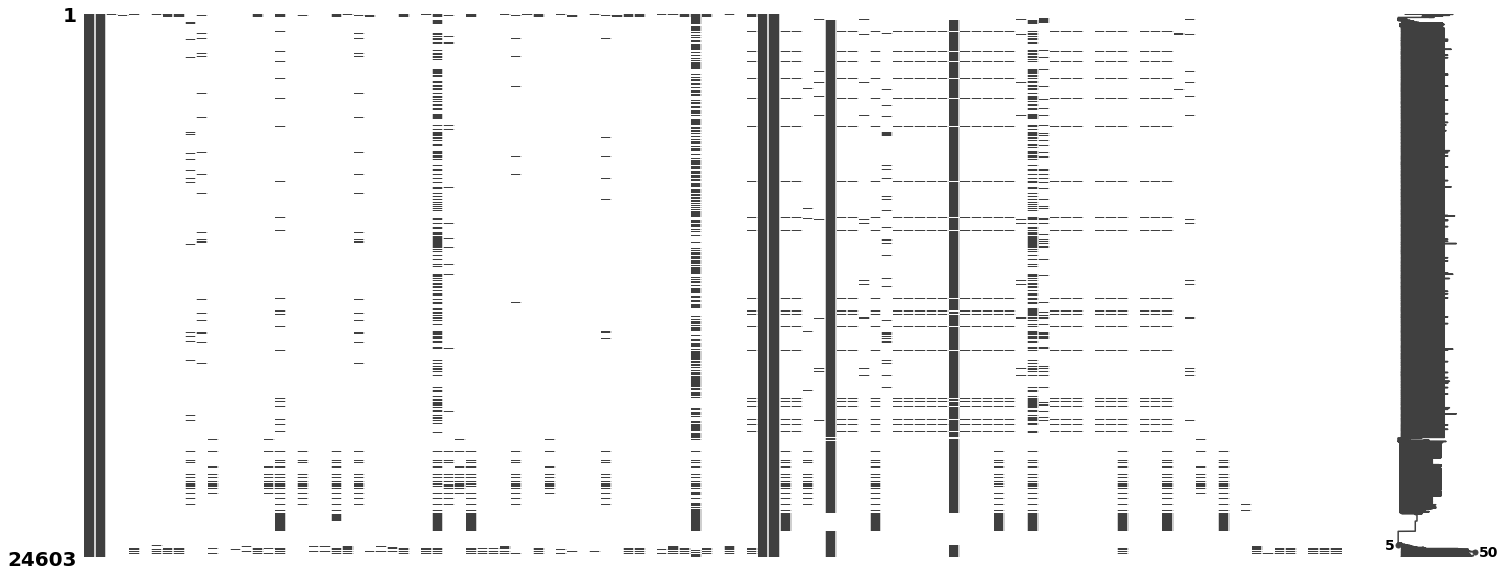

In [12]:
missingno.matrix(drill_df)

<AxesSubplot:>

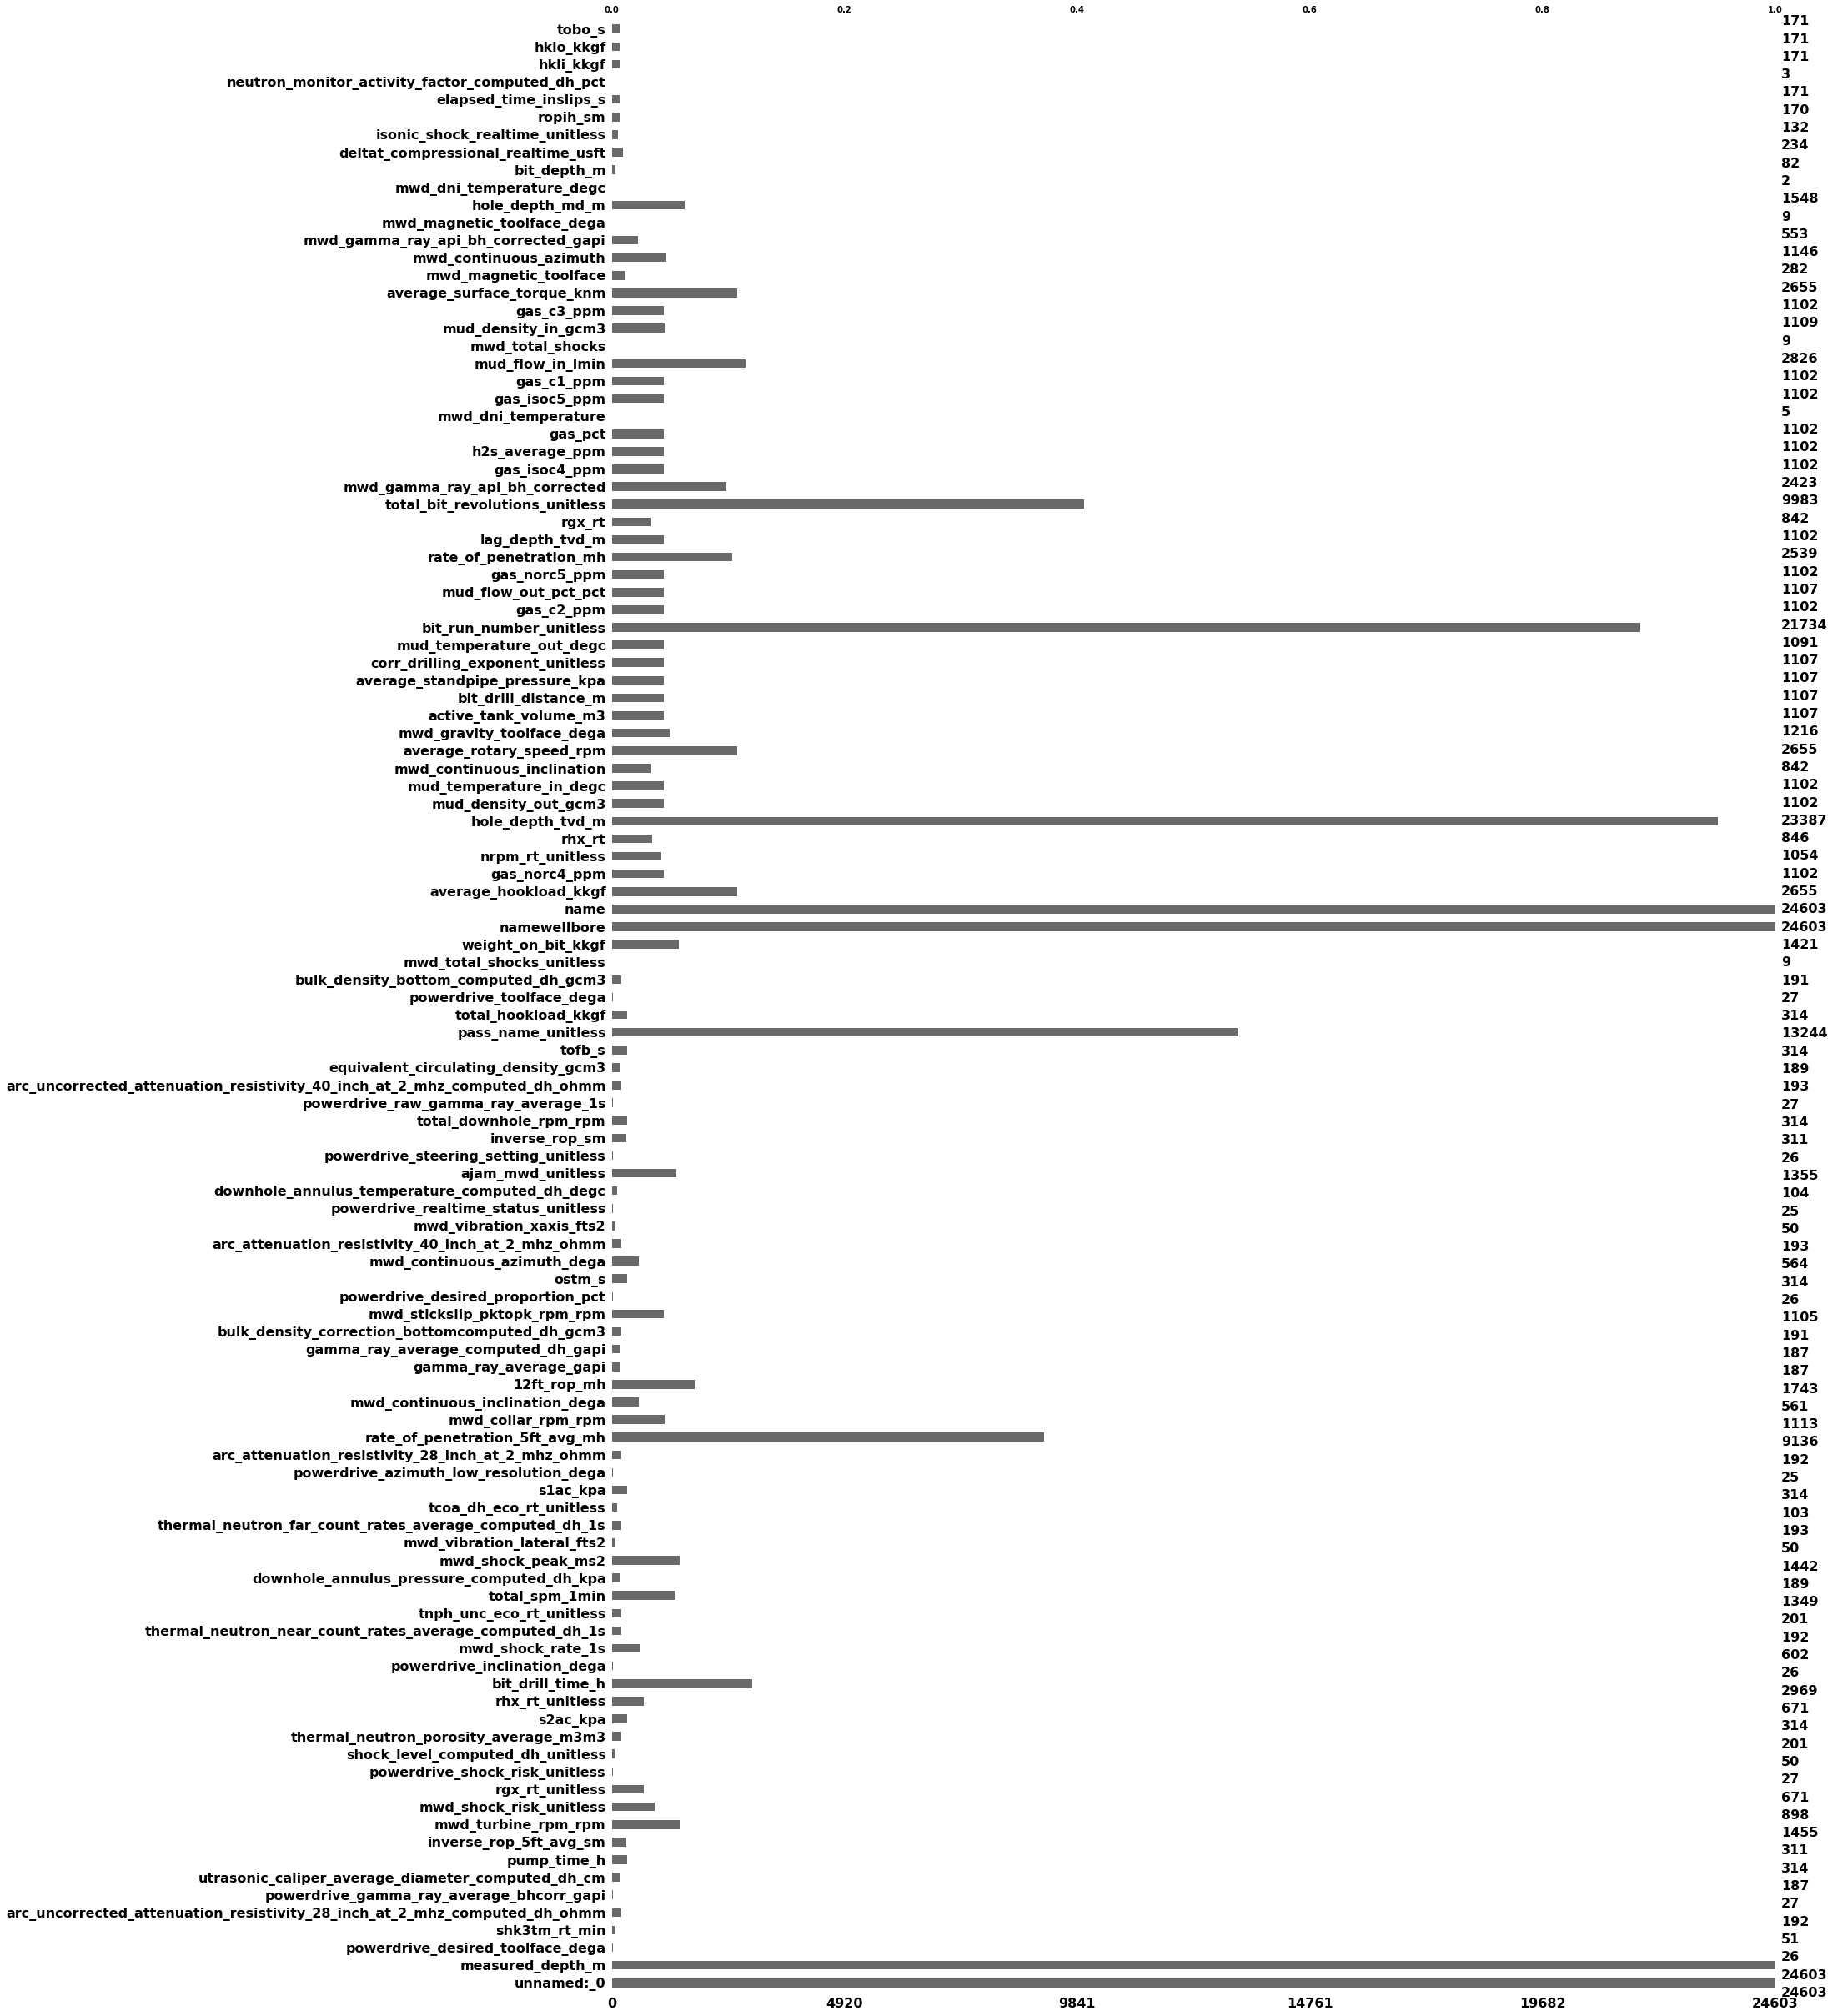

In [13]:
missingno.bar(drill_df)

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(x=drill_df.measured_depth_m, y=drill_df.rate_of_penetration_5ft_avg_mh),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=drill_df.measured_depth_m, y=drill_df.mwd_dni_temperature_degc),
    row=2, col=1
)

fig.update_layout(height=800, width=600, title_text=well_name)